In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-30 / Aki Taanila


## Scatterplot - kahden määrällisen muuttujan välinen riippuvuus

Seabornin **scatterplot** sopii kahden määrällisen muuttujan välisen riippuvuuden tarkasteluun. Lisätietoa https://seaborn.pydata.org/generated/seaborn.scatterplot.html.

### Tuonnit ja alkuvalmistelut

Grafiikan tyylimäärittelyssä voit käyttää **'whitegrid'** sijasta **'white'**, **'dark'**, **'darkgrid'** tai **'ticks'**. Voit myös jättää tyylimäärittelyn tekemättä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Datan avaaminen

Seaborn-paketin esimerkkidata **penguins** sisältää tietoja pingviinilajeista eri saarilla.

In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Hajontakaavio/pistekaavio

Kahden määrällisen muuttujan välisen riippuvuuden voit visualisoida hajontakaaviona **scatterplot**-funktiolla. **hue**-parametrilla voit toteuttaa värierottelun kategorisen muuttujan perusteella.

Kaavion otsikko ja akseleiden otsikot ovat tärkeitä kaavion tulkinnassa. Kannattaa laatia kaavio ensin ilman akseleiden otsikoiden määrittelyä, koska joissain tapauksissa oletusotsikot ovat tilanteeseen riittävät. Tässä esimerkissä akselien englanninkieliset oletusotsikot vaihdetaan suomenkielisiksi.

**plt** viittaa **matplotlib.pyplot**-pakettiin, joka sisältää oikotien moniin muotoiluihin. Lisätietoa https://matplotlib.org/stable/api/pyplot_summary.html.

Kaikkea ei voi tehdä **plt**:n kautta, vaan vaativammassa muotoilussa viitataan suoraan kaavioon (**Axes**-luokan olio) ja sen ominaisuuksiin. Tätä varten kaavio sijoitetaan muuttujan arvoksi. Seuraavassa solussa muuttujan nimeksi on annettu **ax**. Lisätietoa **Axes**-luokasta https://matplotlib.org/stable/api/axes_api.html.

Selitteen tunnisteiden (**labels**) korvaamiseenn suomenkielisillä vastineilla on seuraavassa tarvittu viittausta kaavioon (**ax**).

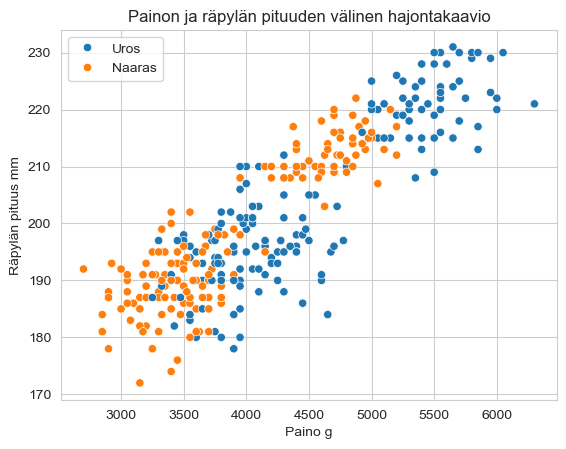

In [4]:
ax = sns.scatterplot(penguins,  x='body_mass_g', y='flipper_length_mm', hue='sex')
plt.title('Painon ja räpylän pituuden välinen hajontakaavio')
plt.xlabel('Paino g')
plt.ylabel('Räpylän pituus mm')

handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ['Uros', 'Naaras'])

### Relplot

Seabornin **relplot** on oikotie usean hajontakaavion yhdistelmiin kategoristen muuttujien määrittelemissä ryhmissä. Lisätietoa https://seaborn.pydata.org/generated/seaborn.relplot.html.

**relplot** palauttaa **FacetGrid**-olion. Esimerkissä olio sijoitetaan **g**-nimiseen muuttujaan, jonka kautta voidaan tehdä monia muotoiluja. Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html.

Huomaa erityisesti:
- Kuvion kokoa on muutettu parametrilla `height=4`.
- `g.fig.subplots_adjust(top=0.85)`lisää tilaa pääotsikon ja kaavioiden väliin.
-  Selitteen otsikko on vaihdettu suomenkieliseen vastineeseen **Laji**.
- Yksittäisiin kaavioihin voidaan viitata rivi-ja sarakenumeroiden avulla, esimerkiksi `g.axes[0, 0]`. Rivinumero on pakollinen vaikka kuvia olisi vain yhdellä rivillä kuten tässä esimerkissä.

Text(0.5, 1.0, 'Naaras')

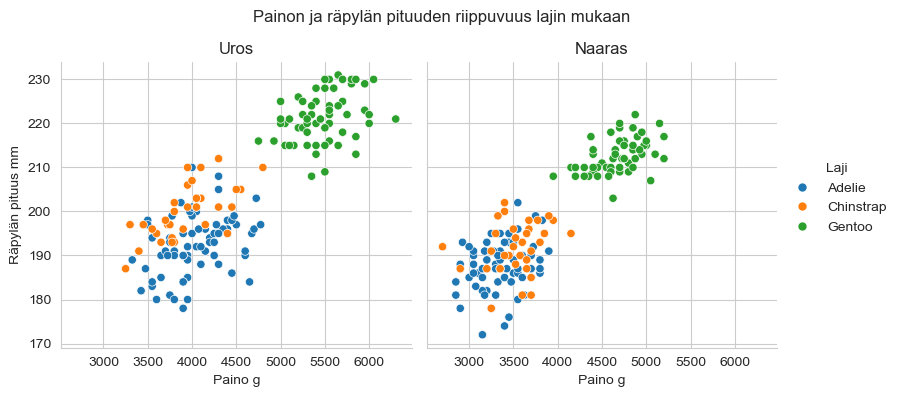

In [5]:
g = sns.relplot(penguins, x='body_mass_g', y='flipper_length_mm', 
                hue='species', col='sex', height=4)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Painon ja räpylän pituuden riippuvuus lajin mukaan')
g.set_axis_labels('Paino g', 'Räpylän pituus mm')
g.legend.set_title('Laji')
g.axes[0, 0].set_title('Uros')
g.axes[0, 1].set_title('Naaras')

### Pairplot

Seabornin **pairplot** on oikotie usean muuttujan kahdenvälisten riippuvuuksien tarkasteluun samassa kuviossa. Jos muuttujia on paljon, niin kaavioiden piirtäminen voi kestää jonkin aikaa. Lisätietoa https://seaborn.pydata.org/generated/seaborn.pairplot.html.

**pairplot** palauttaa **PairGrid**-olion. Esimerkissä olio sijoitetaan **g**-nimiseen muuttujaan. Lisätietoa https://seaborn.pydata.org/generated/seaborn.PairGrid.html.

Seuraavassa tarkastelen nokan pituuden, nokan leveyden, räpylän pituuden ja painon välisiä hajontakaavioita.

Huomaa erityisesti:

- Värierottelun (`hue='species'`) ansiosta näen myös eri lajien välisiä eroja.
- Vasemman reunan ja alareunan akselien otsikot on korvattu suomenkielisillä vastineilla (**lista**). For-silmukan **i** käy läpi arvot 0, 1, 2 ja 3. Vasemman reunan **i**:nteen kaavioon viitataan `g.axes[i, 0]` ja alareunan **i**:nteen kaavioon g.axes[3, i]`.

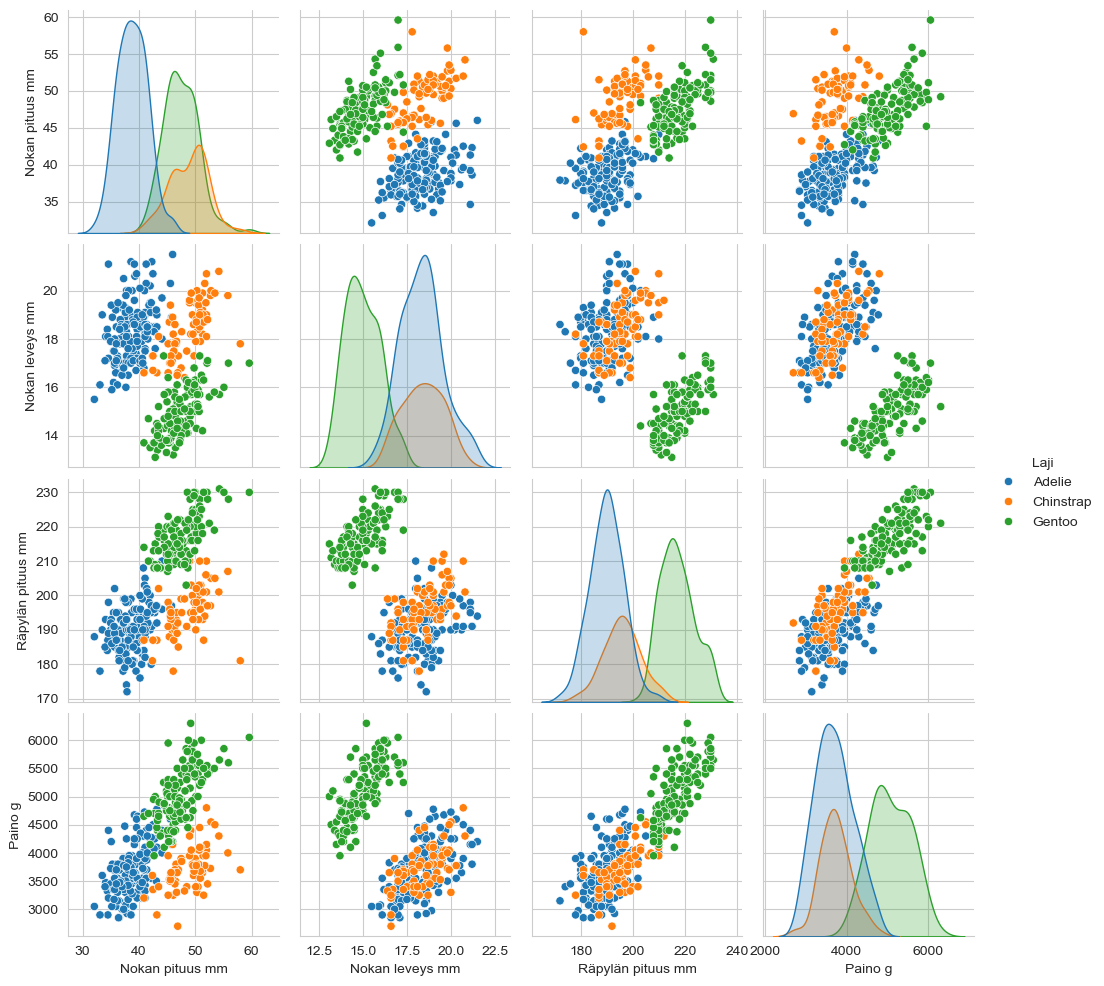

In [6]:
g = sns.pairplot(data=penguins, hue='species')

lista = ['Nokan pituus mm', 'Nokan leveys mm', 'Räpylän pituus mm', 'Paino g']
for i in range(4):
    g.axes[i, 0].set_ylabel(lista[i])
    g.axes[3, i].set_xlabel(lista[i])

g.legend.set_title('Laji')

### Muuta huomioitavaa

#### Fontit

Tekstiä lisäävät funktiot (**plt.title**, **plt.xlabel**, **plt.xticks** jne.) tunnistavat tekstiin liittyviä parametreja https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text kuten esimerkiksi **fontsize** ja **fontstyle**.

Jos haluat tehdä kerralla koko muistiota koskevia fonttimuutoksia, niin katso [matplotlib7.ipynb](https://github.com/taanila/kaaviot/blob/master/matplotlib7.ipynb).

#### Värit

Kaavion väripaletin voit vaihtaa antamalla kaavionluonti-komennossa arvon **palette**-parametrille. Esimerkiksi `palette='Set1'` muuttaa paletiksi **Set1** tai `palette=['green', 'red']` muuntaa kahdenvärisiä pylväitä sisältävän kaavion pylväät vihreiksi ja punaisiksi.

Jos haluat käyttää kaikissa muistion kaavioissa samaa vaihtoehtoista palettia, niin käytä **sns.set_palette**-funktiota, esimerkiksi `sns.set_palette('Set1')`.

- Värejä https://matplotlib.org/stable/gallery/color/named_colors.html.
- Paletteja https://matplotlib.org/stable/gallery/color/colormap_reference.html.

#### Kuvion koko

Kuvion (**Figure**) oletuskoko on **6.4 x 4.8**. Jos haluat vaihtaa koon, niin luo kuvio ennen kaavion luontia, esimerkiksi `plt.figure(figsize=(4, 3))`. Funktioilla **relplot** ja **pairplot** luotavan kaavion kokoa voit säätää **height**-parametrilla.

### Lisätietoa

https://tilastoapu.wordpress.com/python